
Running tests with 100 features...
Starting Conjugate Gradient optimization...
Initial gradient norm: 3.956329e+03
Converged at iteration 52, gradient norm: 4.829068e-04

Done with 53 iterations.

762 function evaluations, 58 gradient evaluations.
f_evals per iteration 15.65, g_evals per iteration 2.12
Optimization completed in 0.049 seconds
Final loss: 8.536906e+02
Final gradient norm: 4.829068e-04
Conjugate Gradient   — 0.053s
L-BFGS-B             — 0.011s
TRON (hessp)         — 0.025s
TRON (full hess)     — 0.020s

Running tests with 500 features...
Starting Conjugate Gradient optimization...
Initial gradient norm: 4.800277e+03


c:\Users\hucu\Desktop\Optimization\algorithms.py:94: LineSearchWarning: The line search algorithm did not converge
  alpha, *_ = line_search(f, grad, x, p,


Converged at iteration 95, gradient norm: 5.349513e-04

Done with 96 iterations.

2156 function evaluations, 162 gradient evaluations.
f_evals per iteration 23.69, g_evals per iteration 2.71
Optimization completed in 0.316 seconds
Final loss: 6.419659e+02
Final gradient norm: 5.349513e-04
Conjugate Gradient   — 0.328s
L-BFGS-B             — 0.061s
TRON (hessp)         — 0.160s
TRON (full hess)     — 0.143s

Running tests with 1000 features...
Starting Conjugate Gradient optimization...
Initial gradient norm: 5.194499e+03

Done with 200 iterations.

4956 function evaluations, 364 gradient evaluations.
f_evals per iteration 25.90, g_evals per iteration 2.83
Optimization completed in 0.831 seconds
Final loss: 5.210764e+01
Final gradient norm: 3.666827e+02
Conjugate Gradient   — 0.858s


c:\Users\hucu\Desktop\Optimization\algorithms.py:202: RuntimeWarning: CG did not converge. Final gradient norm: 3.666827e+02 > 0.001
  warnings.warn(


L-BFGS-B             — 0.985s
TRON (hessp)         — 3.090s
TRON (full hess)     — 3.052s

Running tests with 1500 features...
Starting Conjugate Gradient optimization...
Initial gradient norm: 5.628808e+03

Done with 200 iterations.

7516 function evaluations, 566 gradient evaluations.
f_evals per iteration 38.77, g_evals per iteration 3.84
Optimization completed in 1.040 seconds
Final loss: 3.244888e+00
Final gradient norm: 4.558703e+00
Conjugate Gradient   — 1.082s


c:\Users\hucu\Desktop\Optimization\algorithms.py:202: RuntimeWarning: CG did not converge. Final gradient norm: 4.558703e+00 > 0.001
  warnings.warn(


L-BFGS-B             — 1.679s
TRON (hessp)         — 3.443s
TRON (full hess)     — 5.655s

Running tests with 2000 features...
Starting Conjugate Gradient optimization...
Initial gradient norm: 5.651494e+03

Done with 200 iterations.

9923 function evaluations, 768 gradient evaluations.
f_evals per iteration 50.86, g_evals per iteration 4.86
Optimization completed in 1.217 seconds
Final loss: 3.566911e+00
Final gradient norm: 2.912322e+01
Conjugate Gradient   — 1.261s


c:\Users\hucu\Desktop\Optimization\algorithms.py:202: RuntimeWarning: CG did not converge. Final gradient norm: 2.912322e+01 > 0.001
  warnings.warn(


L-BFGS-B             — 2.863s
TRON (hessp)         — 6.037s
TRON (full hess)     — 12.209s


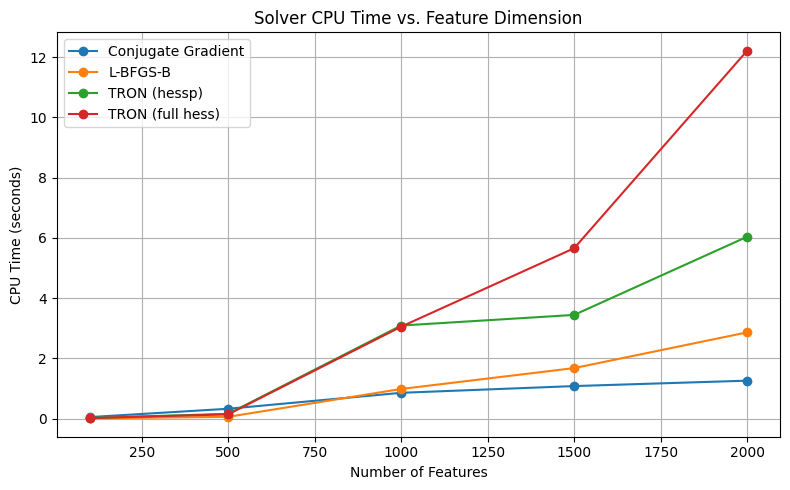

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from algorithms import ConjugateGradientSolver, LBFGSSolver, TrustRegionNewtonSolver

C = 1.0

feature_sizes = [100, 500, 1000, 1500, 2000]
n_samples = 2000

solvers = {
    'Conjugate Gradient': ConjugateGradientSolver(max_iter=200, tol=1e-3, switch_line=1e-2),
    'L-BFGS-B':         LBFGSSolver(),
    'TRON (hessp)':     TrustRegionNewtonSolver(tol=1e-3, max_iter=200, full_hessian=False),
    'TRON (full hess)': TrustRegionNewtonSolver(tol=1e-3, max_iter=200, full_hessian=True)
}

times = {name: [] for name in solvers}

for n_features in feature_sizes:
   
    X, y = make_classification(n_samples=n_samples,
                               n_features=n_features,
                               n_informative=n_features // 2,
                               n_redundant=n_features // 4,
                               random_state=0)
    y = np.where(y == 0, -1, +1)
    
    X_scaled = StandardScaler().fit_transform(X)
    
    for name, solver in solvers.items():
        start = time.time()
        solver.solve(X_scaled, y, C)
        duration = time.time() - start
        times[name].append(duration)
        print(f'{name:20s} — {duration:.3f}s')

plt.figure(figsize=(8, 5))
for name, t_list in times.items():
    plt.plot(feature_sizes, t_list, marker='o', label=name)
plt.xlabel('Number of Features')
plt.ylabel('CPU Time (seconds)')
plt.title('Solver CPU Time vs. Feature Dimension')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
